In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency,randint, uniform
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report,roc_curve, roc_auc_score,precision_recall_curve,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

# Data Loading

In [11]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [12]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(88).T

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,0191-ZHSKZ,3887-PBQAO,5919-TMRGD,8108-UXRQN,9191-MYQKX,9919-YLNNG,0318-ZOPWS,4445-ZJNMU,4808-YNLEU,1862-QRWPE
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Female,Female,Female,Female,Female,Male,Female,Female
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,Yes,Yes,Yes,No,No,No,No,No,Yes
tenure,1,34,2,45,2,8,22,10,28,62,...,30,45,1,11,7,42,49,9,35,48
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,No,No,Yes,No,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,DSL,No,Fiber optic,DSL,Fiber optic,Fiber optic,No,Fiber optic,DSL,No
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,Yes,No internet service,No,Yes,No,No,No internet service,No,Yes,No internet service


In [13]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(7).T

,0,1,2,3,4,5,6
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK
gender,Female,Male,Male,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes
tenure,1,34,2,45,2,8,22
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

*convert datatype for 'TotalCharges'*

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


*Summary statistics*

In [17]:
df['customerID'].duplicated().sum()

0

*Check for duplicated customers*

In [18]:
print((df.isna()).sum())  

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


*Check for missing values*

In [19]:
df[df['TotalCharges'].isna()==True]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [20]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [21]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

* droping rows with 0 value in tenure & TotalCharges

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
def senior_c(i):
    if i == 1:
      return 'Yes'
    else:
      return 'No'
df['SeniorCitizen']=df['SeniorCitizen'].apply(senior_c)

*Convert 'SeniorCitizen' to Yes/No*

In [24]:
df.drop(['customerID'], axis=1, inplace=True, errors='ignore')

*Drop unnecessary column*

In [25]:
x=[(df.select_dtypes(include=['object']))]
for i in x:
    print (i.nunique())

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64


*Unique values in categorical columns*

*Ensuring data consistency*

In [26]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: ['No' 'Yes']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Chu

*Check for inconsistent categorical values*

In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

*Display final dataset info*

# EDA & Visualizations

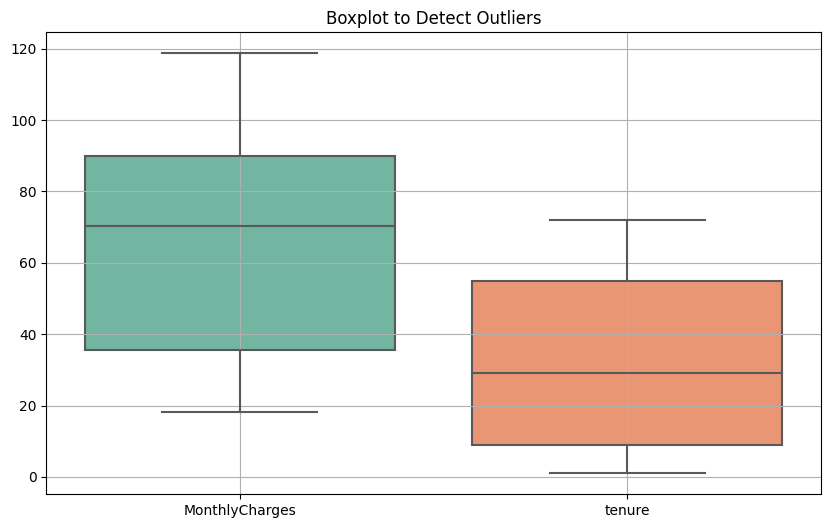

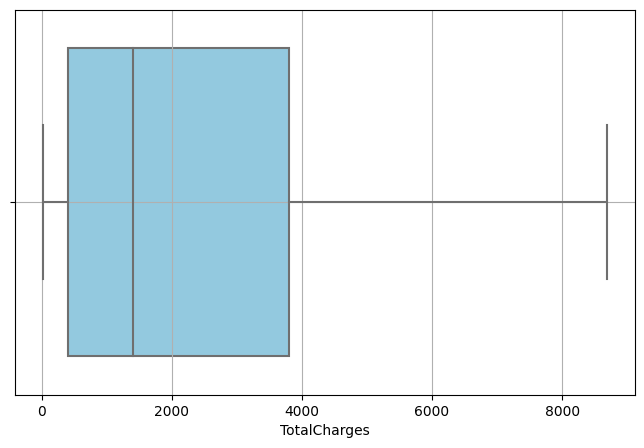

In [29]:
score_columns=['MonthlyCharges','tenure']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[score_columns], palette="Set2")
plt.title("Boxplot to Detect Outliers")
plt.grid()
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalCharges'], color="skyblue")
plt.xlabel("TotalCharges")
plt.grid()
plt.show()

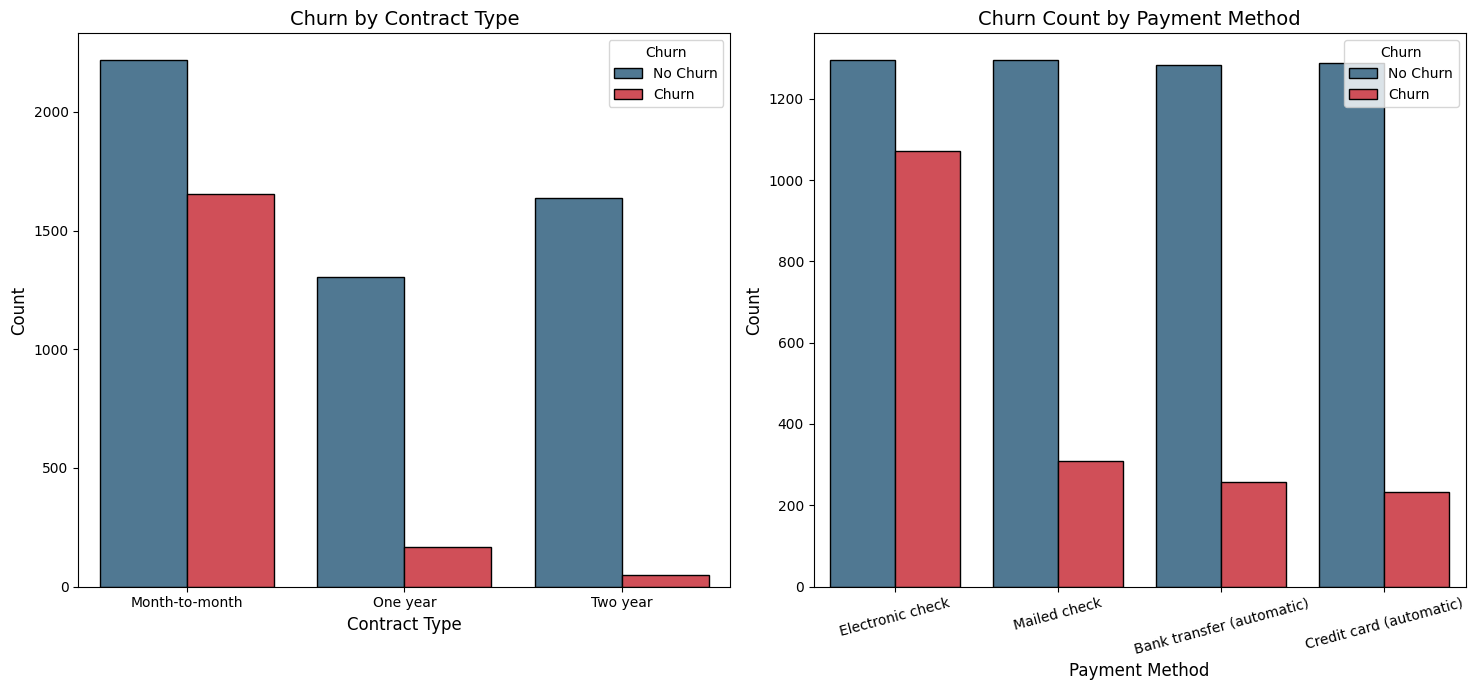

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Two plots side by side
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0], 
              palette={'Yes': '#E63946', 'No': '#457B9D'}, edgecolor='black')
axes[0].set_title("Churn by Contract Type", fontsize=14)
axes[0].set_xlabel("Contract Type", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(title="Churn", labels=["No Churn", "Churn"])
sns.countplot(x="PaymentMethod", hue="Churn", data=df, ax=axes[1], 
              palette={'Yes': '#E63946', 'No': '#457B9D'}, edgecolor='black')
axes[1].set_title("Churn Count by Payment Method", fontsize=14)
axes[1].set_xlabel("Payment Method", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend(title="Churn", labels=["No Churn", "Churn"])
plt.tight_layout() 
plt.show()

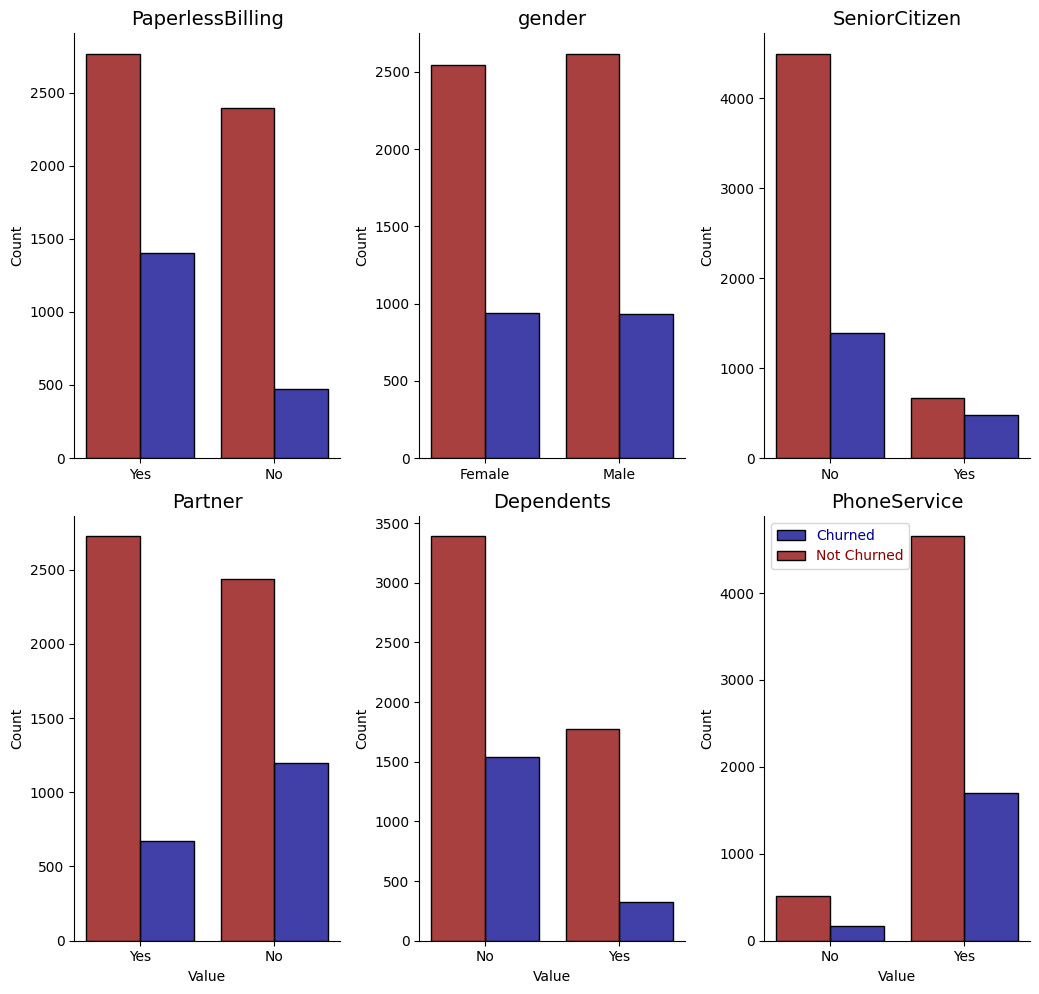

In [31]:
col = ['PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']
df_melted = df.melt(id_vars=['Churn'], value_vars=col, var_name='Feature', value_name='Value')
df_melted['Churn'] = df_melted['Churn'].astype(str)
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=3, height=5, aspect=0.7, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x='Value', hue='Churn', multiple='dodge', palette={'Yes': 'darkblue', 'No': 'darkred'}, shrink=0.8)
g.set_titles(col_template="{col_name}", size=14)
plt.legend(['Churned', 'Not Churned'], labelcolor=['darkblue', 'darkred'])
plt.show()

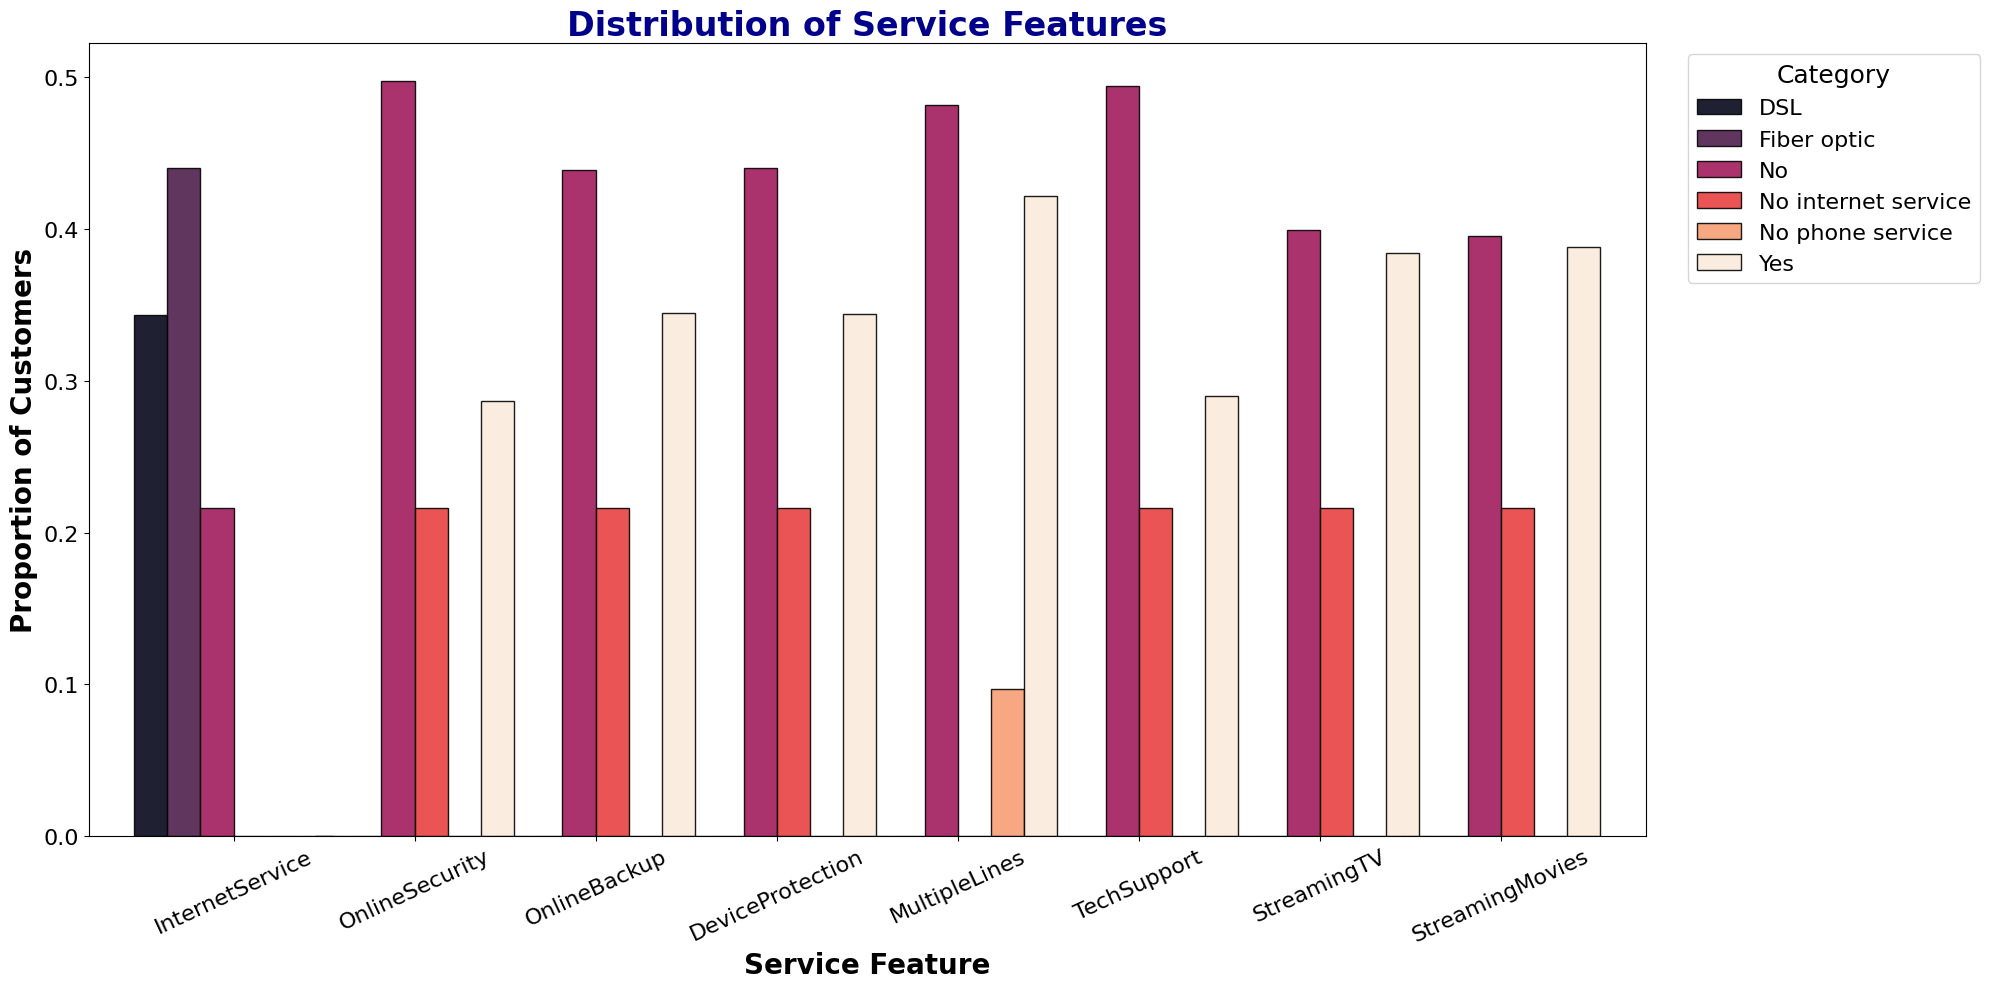

In [32]:
cat_cols = [ 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'MultipleLines' ,'TechSupport', 
            'StreamingTV', 'StreamingMovies']

cat_counts = {col: df[col].value_counts(normalize=True) for col in cat_cols}
cat_df = pd.DataFrame(cat_counts).T  

fig, ax = plt.subplots(figsize=(20, 10))  

cat_df.plot(kind='bar', stacked=False, colormap='rocket', edgecolor='black', alpha=0.89, width=1.1, ax=ax)


ax.set_title("Distribution of Service Features", fontsize=24, fontweight='bold', color='darkblue')
ax.set_xlabel("Service Feature", fontsize=20, fontweight='bold')
ax.set_ylabel("Proportion of Customers", fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(title="Category", fontsize=16, title_fontsize=18, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

In [33]:
tcol = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=[f"Churn vs {tcol[0]}", f"Churn vs {tcol[1]}", f"Churn vs {tcol[2]}"], 
    specs=[[{"type": "box"}, {"type": "box"}], [{"colspan": 2}, None]] 
)
fig.add_trace(go.Box(y=df['tenure'], x=df['Churn'], name="tenure", boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df['MonthlyCharges'], x=df['Churn'], name="MonthlyCharges", boxmean=True), row=1, col=2)
fig.add_trace(go.Box(y=df['TotalCharges'], x=df['Churn'], name="TotalCharges", boxmean=True), row=2, col=1)
fig.update_layout(
    title_text="Churn Distribution Across Key Features",
    showlegend=False,
    height=800,
    width=800
)
fig.show(renderer='iframe')

In [34]:
df['Churn']=df['Churn'].replace(['Yes','No'],['1','0']).astype(int)

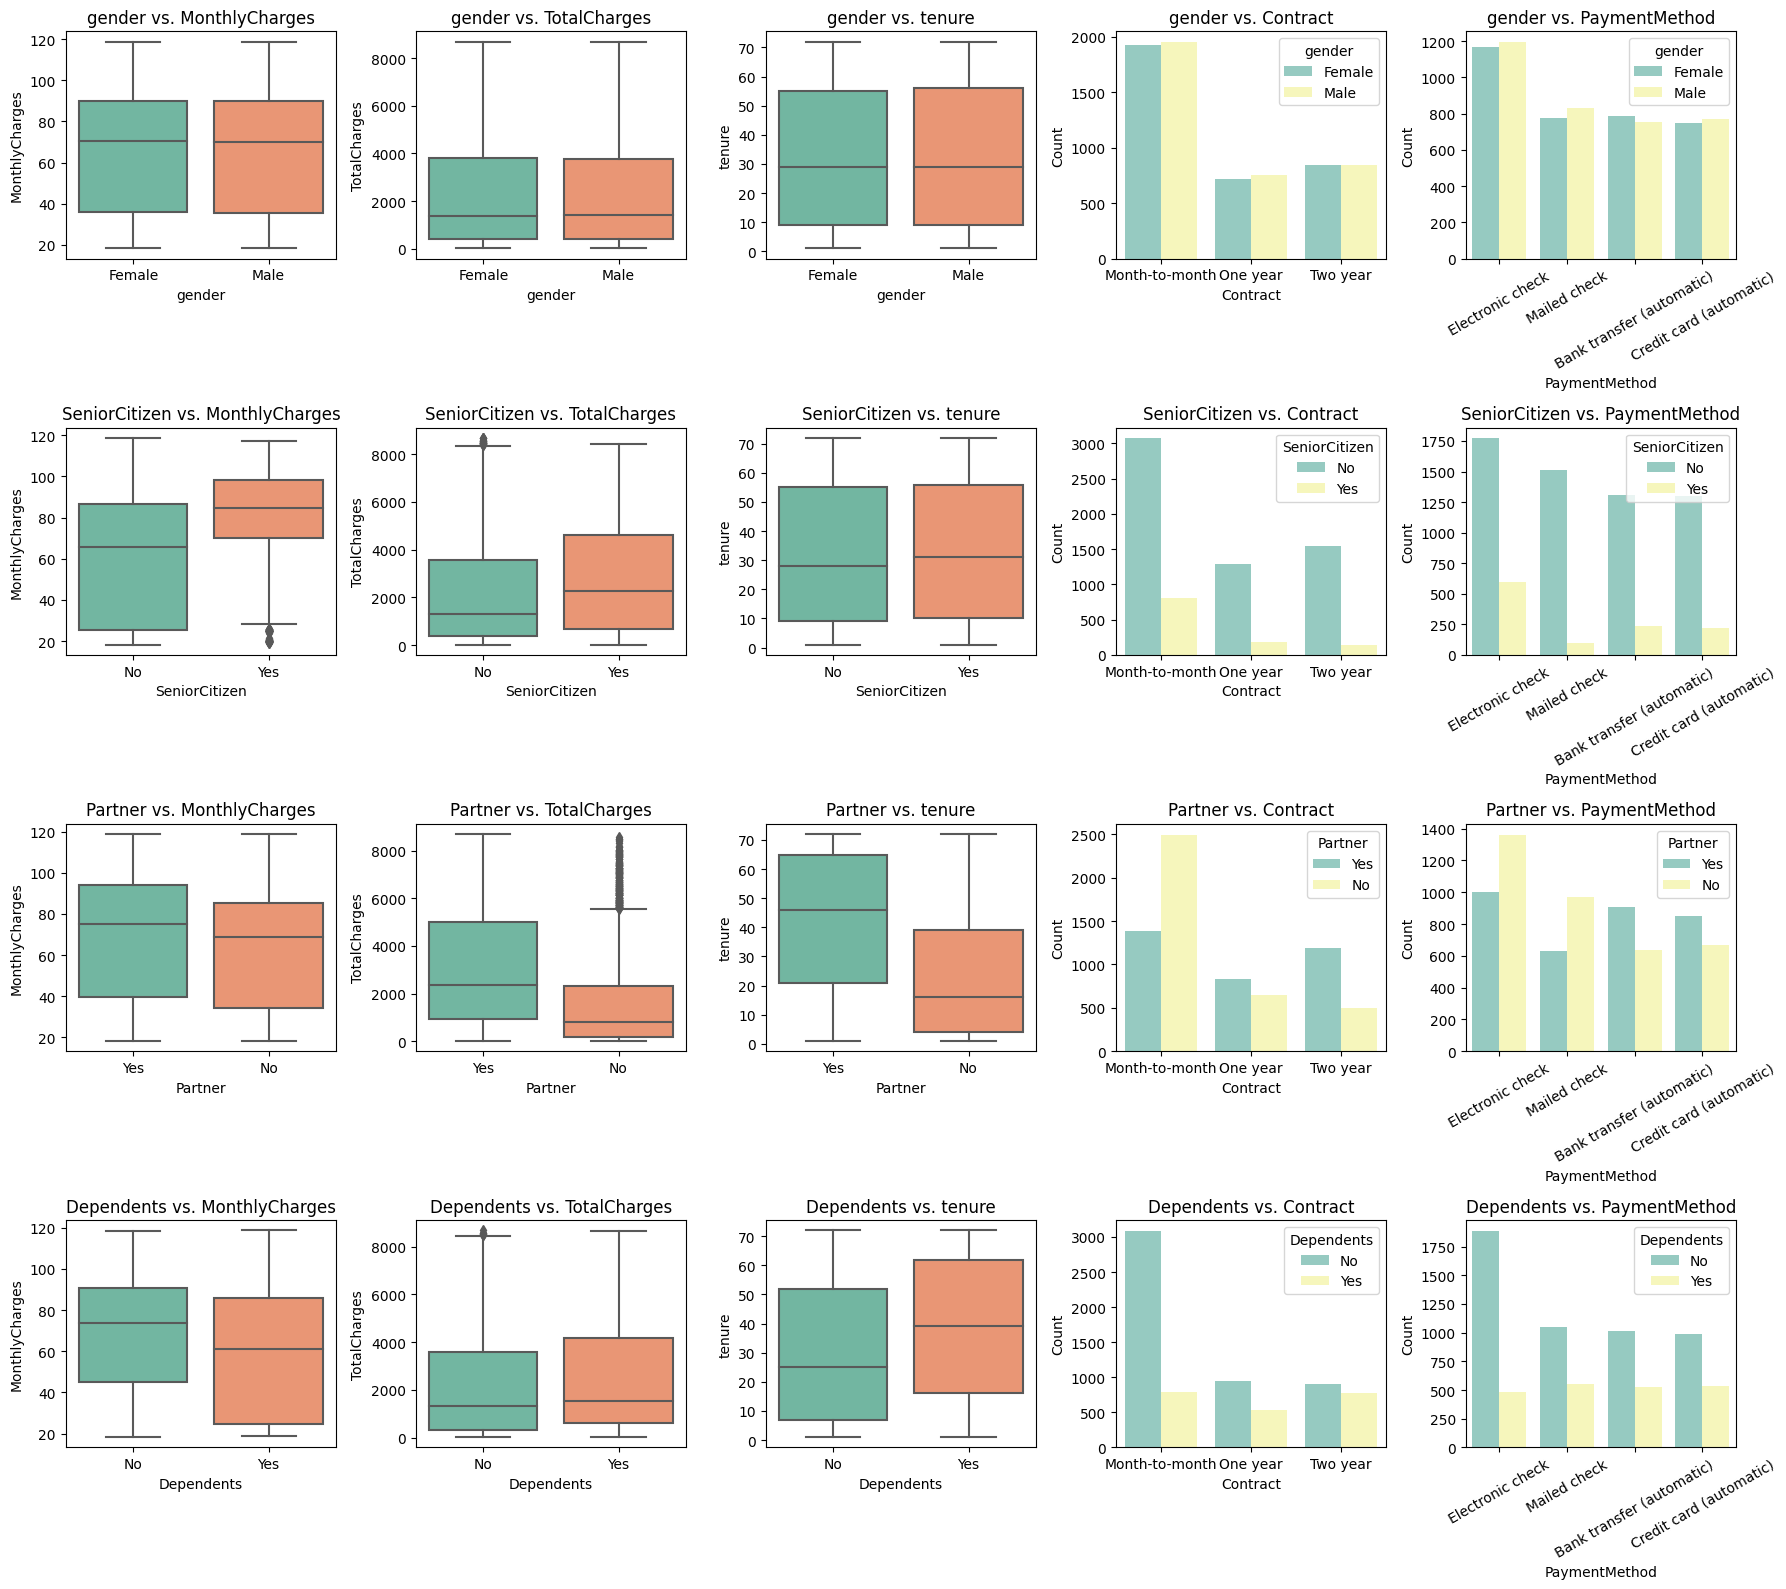

In [35]:
cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
num_vars = ['MonthlyCharges', 'TotalCharges', 'tenure']

fig, axs = plt.subplots(len(cat_vars), len(num_vars) + 2, figsize=(18, 16)) 

for i, cat in enumerate(cat_vars):
    for j, num in enumerate(num_vars):
        sns.boxplot(x=df[cat], y=df[num], ax=axs[i, j], palette='Set2')
        axs[i, j].set_title(f'{cat} vs. {num}')
        axs[i, j].set_xlabel(cat)
        axs[i, j].set_ylabel(num)

for i, cat in enumerate(cat_vars):
    sns.countplot(x=df['Contract'], hue=df[cat], ax=axs[i, -2], palette='Set3')
    axs[i, -2].set_title(f'{cat} vs. Contract')
    axs[i, -2].set_xlabel('Contract')
    axs[i, -2].set_ylabel('Count')

    sns.countplot(x=df['PaymentMethod'], hue=df[cat], ax=axs[i, -1], palette='Set3')
    axs[i, -1].set_title(f'{cat} vs. PaymentMethod')
    axs[i, -1].set_xlabel('PaymentMethod')
    axs[i, -1].set_ylabel('Count')
    axs[i, -1].tick_params(axis='x', rotation=30) 

plt.tight_layout()
plt.show()

###  Gender Insights  
- **Gender does not significantly impact** Monthly Charges, Total Charges, or Contract type.  

###  Senior Citizen Patterns  
- **Senior citizens have slightly higher Monthly Charges** but **lower Total Charges**, suggesting they do not stay as long.  
- **They also have shorter tenure**, implying a tendency for **earlier churn or late adoption**.  

###  Partner & Dependents Influence  
- **Customers with partners tend to choose longer contracts** (1-year or 2-year) compared to single customers.  
- **They also have higher Monthly & Total Charges**, meaning they are likely **more stable customers**.  
- **Having dependents also correlates with longer tenure**, suggesting family households **stay longer**.  

###  Tenure and Contract Relationships  
- **Customers with long tenure tend to have partners or dependents**, reinforcing the idea that **family stability improves retention**.  
- Customers **without partners/dependents have shorter tenure**, indicating they are more likely to **churn early**.  

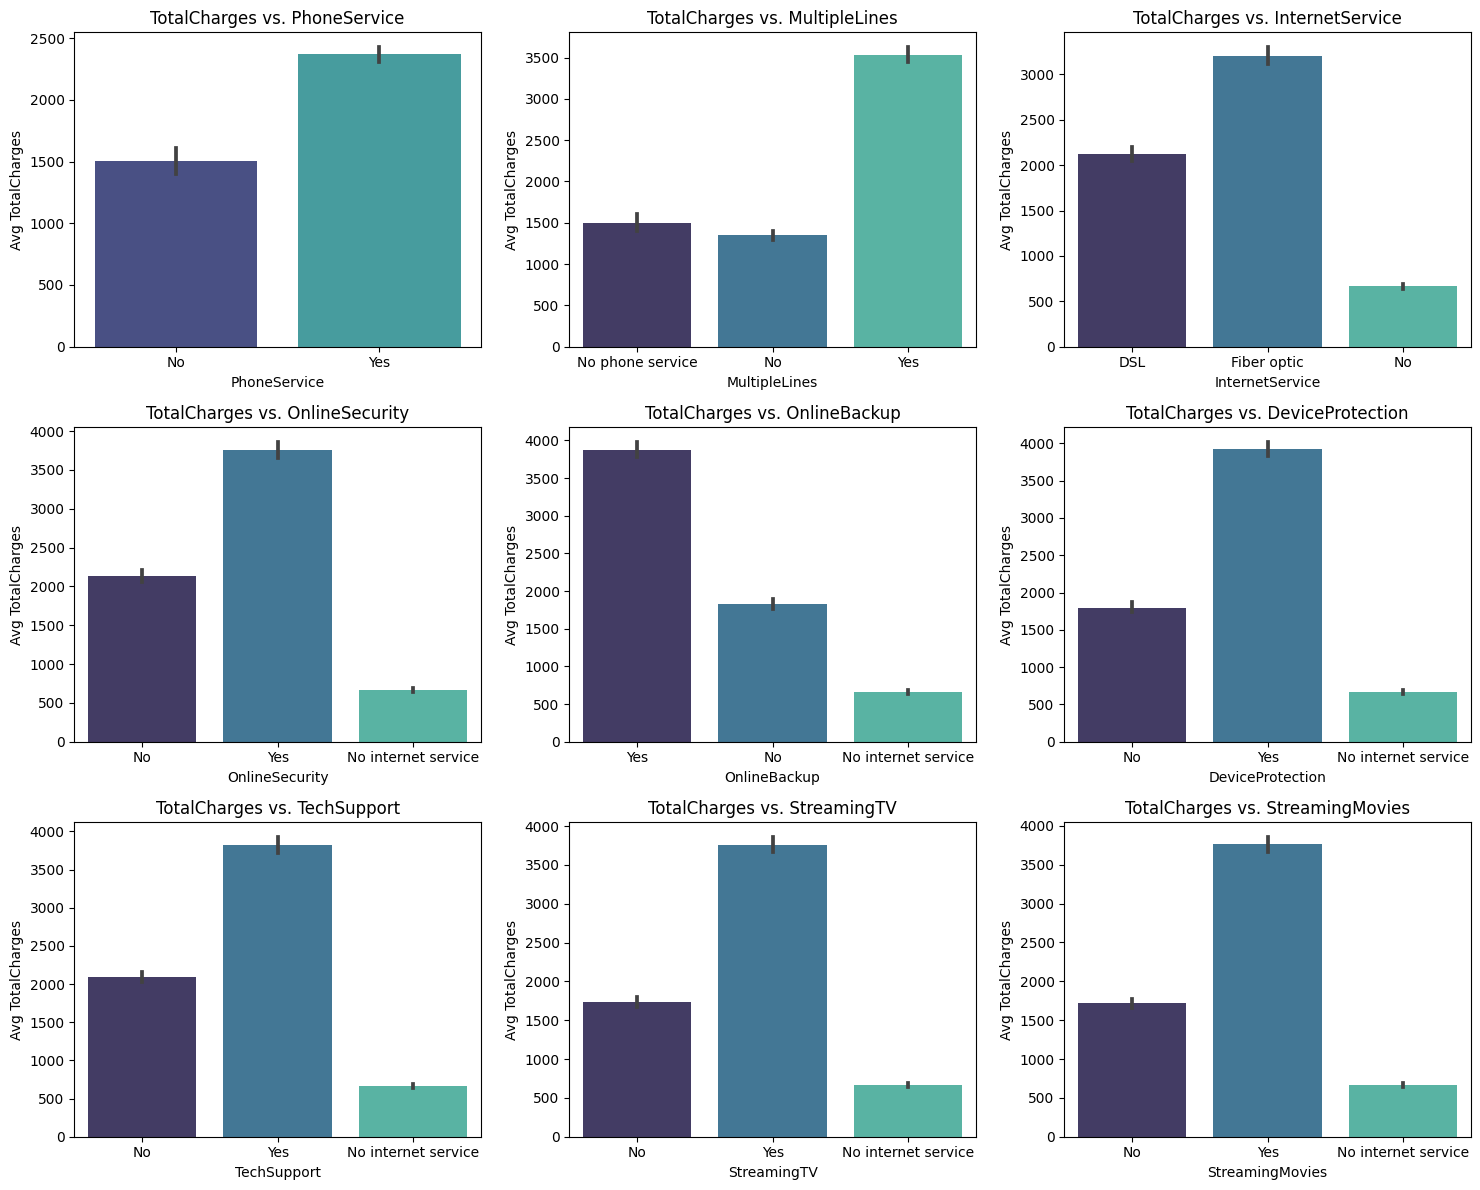

In [36]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
fig, axs = plt.subplots(3, 3, figsize=(15, 12)) 

for i, service in enumerate(service_cols):
    row, col = divmod(i, 3)
    sns.barplot(x=df[service], y=df['TotalCharges'], ax=axs[row, col], estimator=np.mean, palette='mako')
    axs[row, col].set_title(f'TotalCharges vs. {service}')
    axs[row, col].set_xlabel(service)
    axs[row, col].set_ylabel('Avg TotalCharges')
plt.tight_layout()
plt.show()

## Observations from **TotalCharges** vs. Various Services

#### 📞 Phone & Multiple Lines:
- Customers with **Phone Service** tend to have **higher TotalCharges**.
- Users with **Multiple Lines** generally pay more than those with a single line.

#### 🌐 Internet Service:
- **Fiber-optic users** have the **highest TotalCharges**, followed by **DSL users**.
- Customers with **no internet service** have the **lowest TotalCharges**.

#### 🔒 Security & Support Services:
- **Online Security, Tech Support, and Device Protection** subscribers tend to have **higher TotalCharges**.
- Customers **without these services** still pay more than **no internet users**.

#### 🎥 Streaming & Backup Services:
- **Customers subscribed to Streaming TV and Movies** have **higher TotalCharges**.
- **Online Backup users** also pay more compared to non-users.

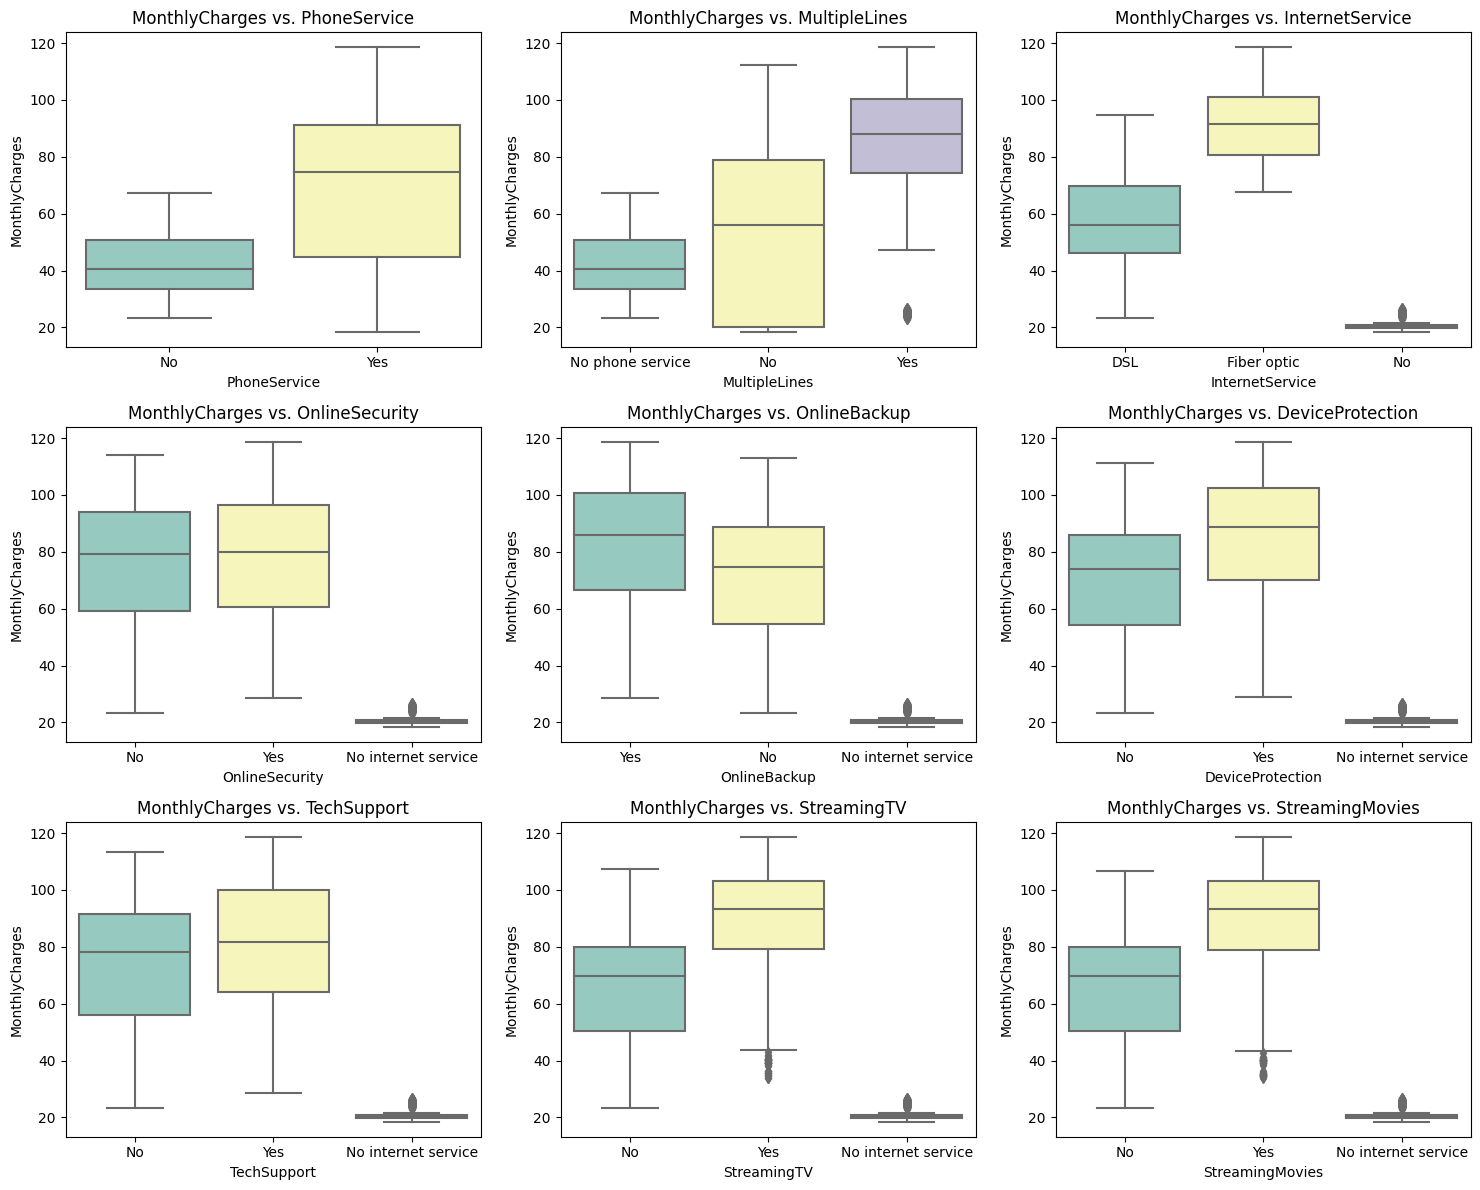

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12)) 

for i, service in enumerate(service_cols):
    row, col = divmod(i, 3)
    sns.boxplot(x=df[service], y=df['MonthlyCharges'], ax=axs[row, col], palette='Set3')
    axs[row, col].set_title(f'MonthlyCharges vs. {service}')
    axs[row, col].set_xlabel(service)
    axs[row, col].set_ylabel('MonthlyCharges')

plt.tight_layout()
plt.show()

## Observations from **MonthlyCharges** vs. Various Services

#### 📞 Phone & Multiple Lines:
- Customers with **Phone Service** have **higher MonthlyCharges** than those without.
- Users with **Multiple Lines** tend to have **higher MonthlyCharges** compared to those with a single line.

#### 🌐 Internet Service:
- **Fiber-optic users** have the **highest MonthlyCharges**, while **DSL users** pay slightly less.
- Customers with **no internet service** have significantly **lower MonthlyCharges**.

#### 🔒 Security & Support Services:
- **Online Security, Tech Support, and Device Protection** subscribers generally have **higher MonthlyCharges**.
- Customers **without these services** have a lower range of MonthlyCharges, but still higher than those with no internet.

#### 🎥 Streaming & Backup Services:
- Customers who subscribe to **Streaming TV and Movies** pay more in **MonthlyCharges**.
- **Online Backup users** also have **higher MonthlyCharges** than non-users.

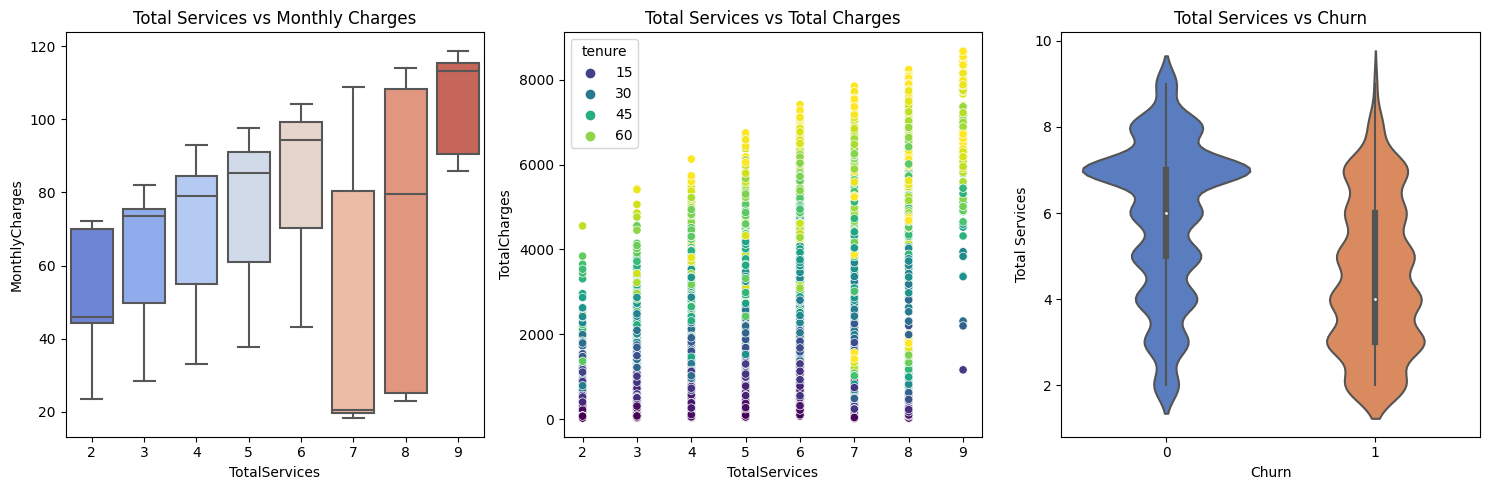

In [38]:
df['TotalServices'] = df[service_cols].apply(lambda row: sum(row != 'No'), axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df["TotalServices"], y=df["MonthlyCharges"], palette="coolwarm", ax=axs[0])
axs[0].set_title("Total Services vs Monthly Charges")

sns.scatterplot(x=df["TotalServices"], y=df["TotalCharges"], hue=df["tenure"], palette="viridis", ax=axs[1])
axs[1].set_title("Total Services vs Total Charges")

sns.violinplot(x=df["Churn"], y=df["TotalServices"], inner="box", palette="muted", ax=axs[2])
axs[2].set_title("Total Services vs Churn")
axs[2].set_xlabel("Churn")
axs[2].set_ylabel("Total Services")

plt.tight_layout()
plt.show()

## **Service Usage vs. Charges & Churn**

### **Total Services vs. Monthly Charges**  
- More services → Higher monthly charges.  
- Charges increase significantly after 5+ services.  

### **Total Services vs. Total Charges**  
- Higher tenure → Higher total charges.  
- More services lead to higher total spending, but tenure matters.  

### **Total Services vs. Churn**  
- Churners have fewer services on average.  
- Customers with 4+ services churn less, suggesting bundled services improve retention.  

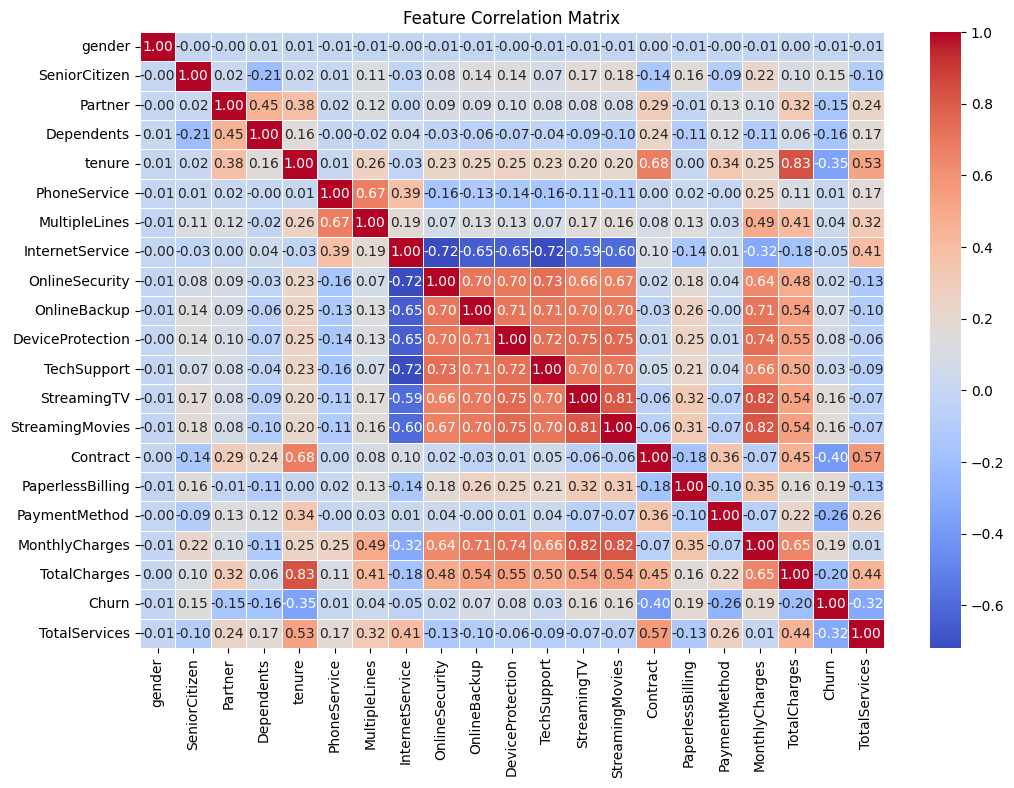

In [39]:
df_temp = df.copy()

binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_temp[binary_cols] = df_temp[binary_cols].replace({'Yes': 1, 'No': 0})

internet_related_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies']
df_temp[internet_related_cols] = df_temp[internet_related_cols].replace(
    {'No internet service': 0, 'No': 1, 'Yes': 2}
)

df_temp['MultipleLines'] = df_temp['MultipleLines'].replace({'No phone service': 0, 'No': 1, 'Yes': 2})

df_temp['gender'] = df_temp['gender'].replace({'Female': 0, 'Male': 1})

label_encoding_map = {
    'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaymentMethod': {
        'Electronic check': 0, 'Mailed check': 1, 
        'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3
    }
}

for col, mapping in label_encoding_map.items():
    df_temp[col] = df_temp[col].map(mapping)

df_temp[list(label_encoding_map.keys())] = df_temp[list(label_encoding_map.keys())].astype(float)

corr_matrix = df_temp.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## Feature Correlation Matrix
- Churn is negatively correlated with tenure (-0.35), meaning longer tenure customers are less likely to churn.
- Monthly charges and churn have a weak positive correlation (0.19), indicating higher charges might contribute to churn.
- Online security, tech support, and contract type show notable negative correlations with churn.
"""

In [40]:
c_v = df.select_dtypes(include=['object'])
chi_square = []
for var in c_v:
    c_t = pd.crosstab(df[var], df["Churn"])
    chi2, p, dof, expected = stats.chi2_contingency(c_t)
    chi_square.append({
        "Variable": var.replace("_", " "),
        "Chi-Square Statistic": chi2,
        "P-value": p
    })
chi_square_results_df = pd.DataFrame(chi_square)
chi_square_results_df = chi_square_results_df.sort_values(by="P-value")
print(chi_square_results_df)

            Variable  Chi-Square Statistic        P-value
13          Contract           1179.545829  7.326182e-257
7     OnlineSecurity            846.677389  1.400687e-184
10       TechSupport            824.925564  7.407808e-180
6    InternetService            728.695614  5.831199e-159
15     PaymentMethod            645.429900  1.426310e-139
8       OnlineBackup            599.175185  7.776099e-131
9   DeviceProtection            555.880327  1.959389e-121
12   StreamingMovies            374.268432   5.353560e-82
11       StreamingTV            372.456502   1.324641e-81
14  PaperlessBilling            256.874908   8.236203e-58
3         Dependents            186.321639   2.019659e-42
1      SeniorCitizen            158.440816   2.479256e-36
2            Partner            157.503151   3.973798e-36
5      MultipleLines             11.271541   3.567927e-03
4       PhoneService              0.873733   3.499240e-01
0             gender              0.475455   4.904885e-01


## Chi-Square Test
- **Contract** has the strongest relationship with **Churn** (highest chi-square statistic).
- **OnlineSecurity & TechSupport** show strong associations with **Churn**—customers without these services are more likely to churn.
- **InternetService type** significantly influences **Churn**, as fiber-optic users tend to churn more.
- **PaymentMethod is highly associated with Churn**—electronic check users churn more frequently.
- **Streaming services (StreamingMovies, StreamingTV) also have significant relationships with Churn**, but weaker than security-related services.
- **PaperlessBilling is moderately associated with Churn**, indicating that customers using it are more likely to leave.
- **Demographic factors like Dependents, Partner, and SeniorCitizen have lower but still notable associations.**
- **Gender and PhoneService are not significantly related to Churn.**

In [41]:
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = df.copy()
for col in categorical_vars:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])
X_cat = df_encoded[categorical_vars]  
y = df["Churn"] 
mi_scores = mutual_info_classif(X_cat, y, discrete_features=True)
mi_results = pd.DataFrame({"Feature": categorical_vars, "MI Score": mi_scores}).sort_values(by="MI Score", ascending=False)
print("Mutual Information Scores (Higher = More Important)")
print(mi_results)

Mutual Information Scores (Higher = More Important)
             Feature  MI Score
13          Contract  0.098182
7     OnlineSecurity  0.064528
10       TechSupport  0.062873
6    InternetService  0.055394
8       OnlineBackup  0.046659
15     PaymentMethod  0.044423
9   DeviceProtection  0.043784
12   StreamingMovies  0.031918
11       StreamingTV  0.031803
14  PaperlessBilling  0.019119
3         Dependents  0.014270
2            Partner  0.011383
1      SeniorCitizen  0.010533
5      MultipleLines  0.000798
4       PhoneService  0.000069
0             gender  0.000037


## Mutual Information (MI) Scores
- **Contract has the highest MI score**, meaning it is the strongest predictor of **Churn**.
- **OnlineSecurity, TechSupport, and InternetService also have high MI scores**, reinforcing their importance in churn prediction.
- **PaymentMethod shows a moderate predictive power**, aligning with the chi-square test findings.
- **Streaming services (StreamingMovies, StreamingTV) have lower MI scores**, meaning they contribute to churn but are not primary drivers.
- **PaperlessBilling has some predictive power but is weaker than Contract or Security-related features.**
- **Dependents, Partner, and SeniorCitizen have low MI scores, meaning they contribute little predictive power.**
- **Gender, PhoneService, and MultipleLines have near-zero MI scores, confirming they are not useful predictors of Churn.**

In [42]:
df=df.drop(columns=['gender','PhoneService','MultipleLines'],axis=1)

In [43]:
binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

internet_related_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies']
df[internet_related_cols] = df[internet_related_cols].replace({'No internet service': 0, 'No': 1, 'Yes': 2})


label_encoding_map = {
    'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaymentMethod': {
        'Electronic check': 0, 'Mailed check': 1, 
        'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3
    }
}

for col, mapping in label_encoding_map.items():
    df[col] = df[col].map(mapping)

# MODELING

In [44]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = MinMaxScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [46]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_resampled, y_resampled)
model1.score(X_test,y_test)

0.7356076759061834

In [48]:
#model1.fit(X_train,y_train)
#model1.score(X_test,y_test)

In [49]:
y_pred = model1.predict(X_test)
cm=(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[744 289]
 [ 83 291]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



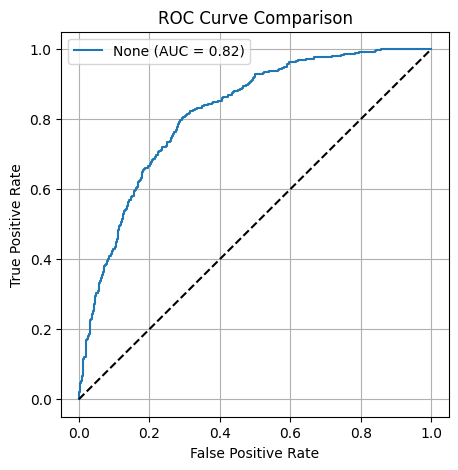

In [50]:
def plot_roc(model1, X_test, y_test, label=None):
    y_problr = model1.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_problr)
    auc = roc_auc_score(y_test, y_problr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(5, 5))
plot_roc(model1, X_test, y_test)

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
model2=knn.fit(X_resampled, y_resampled)
model2.score(X_resampled, y_resampled)

0.8664648910411622

In [52]:
#model2=knn.fit(X_train, y_train)
#model2.score(X_train, y_train)

In [53]:
y_pred2=model2.predict(X_test)
accurac = accuracy_score(y_test, y_pred2)
accurac

0.7036247334754797

In [54]:
cm2=(confusion_matrix(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[731 302]
 [115 259]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1033
           1       0.46      0.69      0.55       374

    accuracy                           0.70      1407
   macro avg       0.66      0.70      0.67      1407
weighted avg       0.76      0.70      0.72      1407



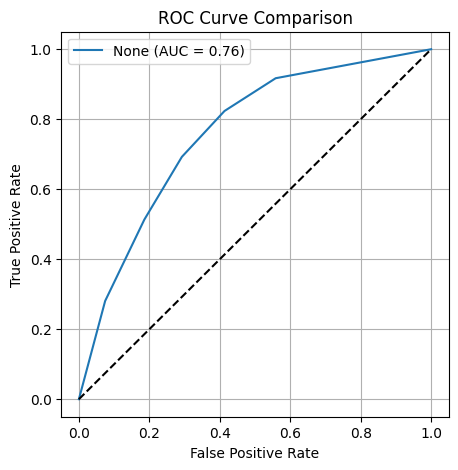

In [55]:
def plot_roc(model2, X_test, y_test, label=None):
    y_probk = model2.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_probk)
    auc = roc_auc_score(y_test, y_probk)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(5, 5))
plot_roc(model2, X_test, y_test)

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# RandomForest

In [56]:
rf= RandomForestClassifier(max_depth=10, random_state=0,class_weight={0: 1, 1: 3})
model3=rf.fit(X_train, y_train)
model3.score(X_train, y_train)

0.8572444444444445

In [57]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=5)

scores = cross_val_score(rf, X_train, y_train, cv=k_fold)
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.7788444444444445


In [58]:
y_pred3 = rf.predict(X_test)
cm3=(confusion_matrix(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[805 228]
 [104 270]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



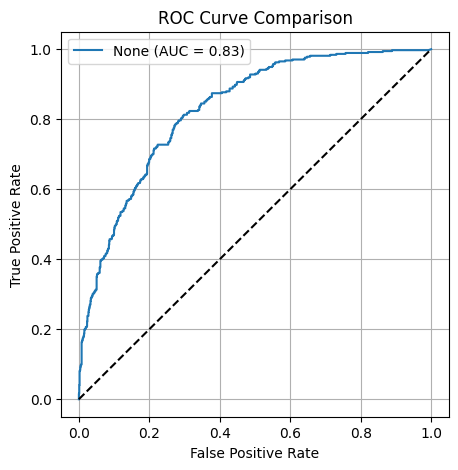

In [59]:
def plot_roc(model3, X_test, y_test, label=None):
    y_probrf = model3.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_probrf)
    auc = roc_auc_score(y_test, y_probrf)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(5, 5))
plot_roc(model3, X_test, y_test)

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# XGB

In [60]:
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 4,n_estimators = 1000)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[933 100]
 [187 187]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407



In [61]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.8023111111111112


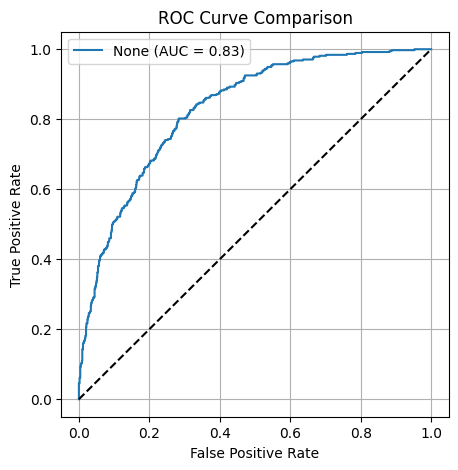

In [62]:
def plot_roc(xgb, X_test, y_test, label=None):
    y_probxgb = xgb.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_probxgb)
    auc = roc_auc_score(y_test, y_probxgb)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(5,5))
plot_roc(xgb, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter tuning

In [63]:
models = {}
best_params = {}
best_acc= {}

# 1. XGBoost - RandomizedSearchCV
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_params = {
    'max_depth': randint(3, 7),
    'learning_rate': uniform(0.01, 0.19),
    'n_estimators': randint(100, 151),
    'subsample': uniform(0.8, 0.2)
}
xgb_search = RandomizedSearchCV(xgb, xgb_params, scoring='accuracy', cv=5, n_iter=20, random_state=42)
xgb_search.fit(X_train, y_train)
models['XGBoost'] = xgb_search.best_estimator_
best_params['XGBoost'] = xgb_search.best_params_
best_acc['XGBoost']=xgb_search.best_score_

# 2. K-Nearest Neighbors - GridSearchCV
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn_search = GridSearchCV(knn, knn_params, scoring='accuracy', cv=5)
knn_search.fit(X_train, y_train)
models['KNN'] = knn_search.best_estimator_
best_params['KNN'] = knn_search.best_params_
best_acc['KNN']=knn_search.best_score_

# 3. Gradient Boosting - GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.5]
}
gb_search = GridSearchCV(gb, gb_params, scoring='f1', cv=5)
gb_search.fit(X_train, y_train)
models['GradientBoosting'] = gb_search.best_estimator_
best_params['GradientBoosting'] = gb_search.best_params_
# Fix for GB accuracy (optional if not tracked earlier)
best_acc['GradientBoosting'] = cross_val_score(gb_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean()


# 4. Logistic Regression - GridSearchCV
lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000, solver='liblinear')
lr_params = {
    'C': [0.1]
}
lr_search = GridSearchCV(lr, lr_params, scoring='accuracy', cv=5)
lr_search.fit(X_train,y_train )
models['LogisticRegression'] = lr_search.best_estimator_
best_params['LogisticRegression'] = lr_search.best_params_
best_acc['LogisticRegression']=lr_search.best_score_

# 5. RandomForest - GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
rf_search = GridSearchCV(rf, rf_params, scoring='accuracy', cv=5)
rf_search.fit(X_train, y_train)
models['RandomForest'] = rf_search.best_estimator_
best_params['RandomForest'] = rf_search.best_params_
best_acc['RandomForest']=rf_search.best_score_
#6.DT
DT=DecisionTreeClassifier(random_state=42)
DT_params={'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]}
DT_search=GridSearchCV(DT,DT_params,scoring='accuracy',cv=5)
DT_search.fit(X_train,y_train)
models['DecisionTree']=DT_search.best_estimator_
best_params['DecisionTree']=DT_search.best_params_
best_acc['DecisionTree']=DT_search.best_score_

In [64]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Best Params:", best_params[name])
    print(classification_report(y_test, y_pred, digits=3))


--- XGBoost ---
Best Params: {'learning_rate': 0.13366880986028204, 'max_depth': 3, 'n_estimators': 101, 'subsample': 0.944399754453365}
              precision    recall  f1-score   support

           0      0.835     0.901     0.867      1033
           1      0.651     0.508     0.571       374

    accuracy                          0.797      1407
   macro avg      0.743     0.705     0.719      1407
weighted avg      0.786     0.797     0.788      1407


--- KNN ---
Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0      0.832     0.850     0.841      1033
           1      0.560     0.527     0.543       374

    accuracy                          0.764      1407
   macro avg      0.696     0.688     0.692      1407
weighted avg      0.760     0.764     0.762      1407


--- GradientBoosting ---
Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
              precision    recall  f1-score   support

   

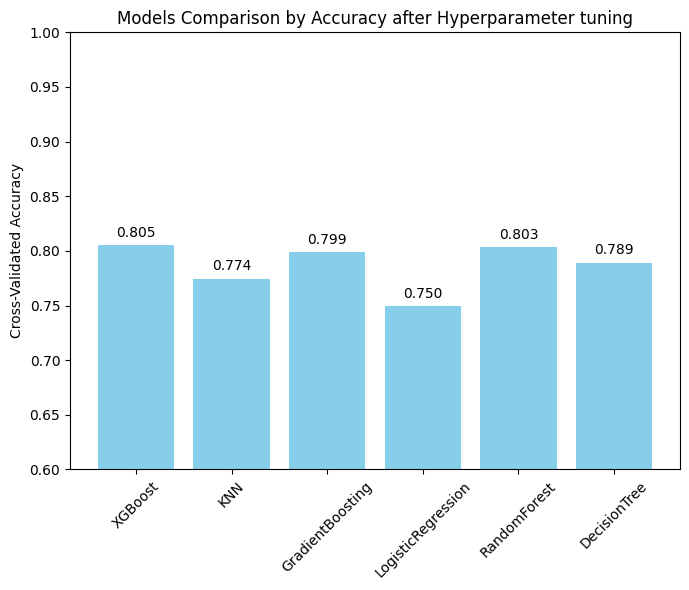

In [65]:
plt.figure(figsize=(7, 6))
plt.bar(best_acc.keys(), best_acc.values(), color='skyblue')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Models Comparison by Accuracy after Hyperparameter tuning')
plt.ylim(0.6, 1.0)
for model, acc in best_acc.items():
    plt.text(model, acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

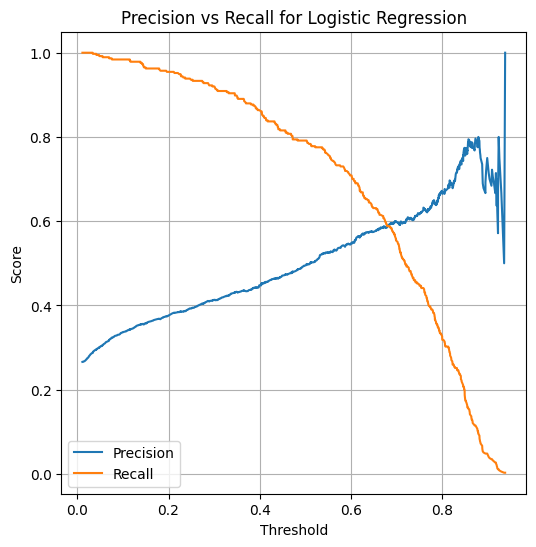

In [66]:
# Get probabilities for class 1 (churners)
y_probs4 = models['LogisticRegression'].predict_proba(X_test)[:, 1]

# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs4)

# Plot Precision vs Recall
plt.figure(figsize=(6, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall for Logistic Regression")
plt.legend()
plt.grid()
plt.show()

In [67]:
chosen_threshold = 0.63

# Apply threshold
y_pred_thresh = (y_probs4 >= chosen_threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1033
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407

[[849 184]
 [129 245]]


In [68]:
y_probs4 = cross_val_predict( models['LogisticRegression'], X_train, y_train, cv=5, method='predict_proba', n_jobs=-1)[:, 1]

y_pred = (y_probs4 >= 0.63).astype(int)

print(f"CV Accuracy: {accuracy_score(y_train, y_pred):.2%}")
print(f"CV Recall: {recall_score(y_train, y_pred):.2%}")

CV Accuracy: 78.76%
CV Recall: 67.63%


In [69]:
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced', solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)),
    ('xgb',XGBClassifier(learning_rate= 0.0849080237694725, max_depth= 3, n_estimators= 114, subsample= 0.9463987883622811,use_label_encoder=False, eval_metric='logloss')),
    ('DT',DecisionTreeClassifier(max_depth= 5, min_samples_split= 5))
]

meta_learner = LogisticRegression(max_iter=1000)

stack_model = StackingClassifier(estimators=base_learners,final_estimator=meta_learner, cv=5)

stack_model.fit(X_train, y_train)
y_pp=stack_model.predict(X_test)
print(classification_report(y_test,y_pp))
print(confusion_matrix(y_test,y_pp))
cv_preds = cross_val_predict(stack_model, X_train, y_train, cv=5, n_jobs=-1)

# CV performance
print(f"CV Accuracy: {accuracy_score(y_train, cv_preds):.2%}")
print(f"CV Recall: {recall_score(y_train, cv_preds):.2%}")

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

[[922 111]
 [180 194]]
CV Accuracy: 80.55%
CV Recall: 55.32%


In [70]:
y_probs = cross_val_predict(stack_model, X_train, y_train, cv=5, method='predict_proba', n_jobs=-1)[:, 1]
y_probs40=stack_model.predict_proba(X_test)[:, 1]
# Apply threshold of 0.4
y_pred43 = (y_probs >= 0.37).astype(int)
y_pred432 = (y_probs40 >= 0.37).astype(int)
print(f"CV Accuracy: {accuracy_score(y_train, y_pred43):.2%}")
print(f"CV Recall: {recall_score(y_train, y_pred43):.2%}")

CV Accuracy: 79.48%
CV Recall: 67.76%


Stacked model with threshold tuning

In [71]:
print(classification_report(y_test,y_pred432))
print(confusion_matrix(y_test,y_pred432))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1033
           1       0.57      0.67      0.62       374

    accuracy                           0.78      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.78      0.79      1407

[[847 186]
 [123 251]]


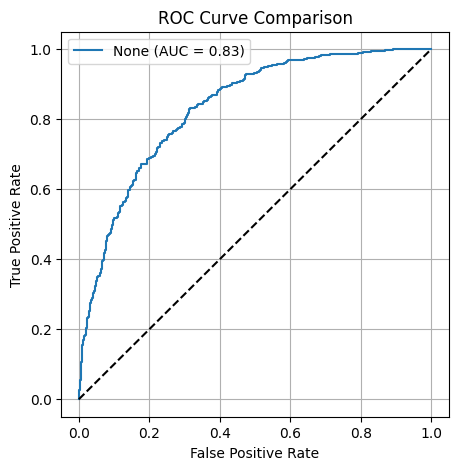

In [72]:
def plot_roc(stack_model, X_test, y_test, label=None):
    fpr, tpr, _ = roc_curve(y_test, y_probs40)
    auc = roc_auc_score(y_test, y_probs40)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(5,5))
plot_roc(stack_model, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

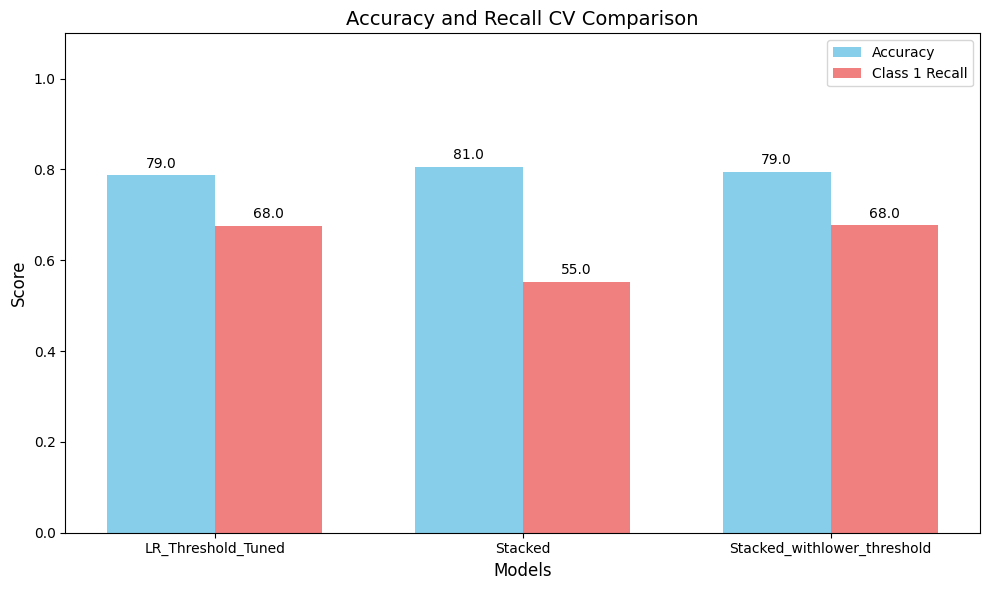

In [73]:
stacking2_rec = recall_score(y_train, cv_preds)
stacking2_acc = accuracy_score(y_train, cv_preds)

stacking2_t_acc = accuracy_score(y_train, y_pred43)
stacking2_t_rec = recall_score(y_train, y_pred43)

lr_t_acc = accuracy_score(y_train, y_pred)
lr_t_rec = recall_score(y_train, y_pred)

models = ['LR_Threshold_Tuned','Stacked','Stacked_withlower_threshold']
accuracies = [lr_t_acc,stacking2_acc,stacking2_t_acc]
recalls = [lr_t_rec,stacking2_rec,stacking2_t_rec]

# Bar positions
x_pos = np.arange(len(models))
width = 0.35  # Width of each bar

# Create bar plot
plt.figure(figsize=(10, 6)) 
plt.bar(x_pos - width/2, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x_pos + width/2, recalls, width, label='Class 1 Recall', color='lightcoral')

# Add labels, title, and annotations
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Accuracy and Recall CV Comparison", fontsize=14)
plt.xticks(x_pos, models, rotation=0, ha='center', fontsize=10)
plt.ylim(0, 1.1)  # Adjust y-axis limits if needed

# Add annotations for accuracy and recall values
for i, v in enumerate(accuracies):
    plt.text(x_pos[i] - width/2, v + 0.01, f"{round(v * 100):.1f}", ha='center', va='bottom', fontsize=10) 
for i, v in enumerate(recalls):
    plt.text(x_pos[i] + width/2, v + 0.01, f"{round(v * 100):.1f}", ha='center', va='bottom', fontsize=10) 

plt.legend() 
plt.tight_layout()
plt.show()

In [74]:
import pickle
model_data = {
    'model': stack_model,
    'threshold': 0.37
}
with open('final_stacked_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model and threshold saved.")

Model and threshold saved.
